In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('googleplaystore.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Reviews']=df['Reviews'].astype('int')

In [9]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [10]:
usd_to_inr = 83
df['Price_INR'] = df['Price'] * usd_to_inr


In [11]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8279 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Price_INR       8279 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 903.1+ KB


In [13]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [14]:


def clean_size(size):
    if isinstance(size, str):
        size = size.strip().upper()  
        if size.endswith('M'):
            return float(size.replace('M', ''))
        elif size.endswith('K'):
            return float(size.replace('K', '')) / 1024 
    return np.nan 


In [15]:
df['Size_MB'] = df['Size'].apply(clean_size)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7424 non-null   object 
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8279 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Price_INR       8279 non-null   float64
 12  Size_MB         7424 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 972.6+ KB


In [17]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price              613
Content Rating       0
Genres               0
Last Updated         0
Price_INR          613
Size_MB           1468
dtype: int64

In [18]:
df.describe()

,Rating,Reviews,Installs,Price,Price_INR,Size_MB
count,8892.000000,8.892000e+03,8.892000e+03,8279.0,8279.0,7424.000000
mean,4.187877,4.727764e+05,1.648965e+07,0.0,0.0,22.747273
std,0.522377,2.905052e+06,8.637600e+07,0.0,0.0,23.435118
min,1.000000,1.000000e+00,1.000000e+00,0.0,0.0,0.008301
25%,4.000000,1.640000e+02,1.000000e+04,0.0,0.0,5.100000
50%,4.300000,4.714500e+03,5.000000e+05,0.0,0.0,14.000000
75%,4.500000,7.126675e+04,5.000000e+06,0.0,0.0,33.000000
max,5.000000,7.815831e+07,1.000000e+09,0.0,0.0,100.000000


In [19]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
SHOPPING               4.251485
WEATHER                4.244000
SPORTS                 4.225175
PRODUCTIVITY           4.201796
FAMILY                 4.191153
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.182895
MEDICAL                4.182450
LIBRARIES_AND_DEMO     4.178462
HOUSE_AND_HOME         4.164706
FOOD_AND_DRINK         4.164151
COMICS                 4.155172
COMMUNICATION          4.151466
ENTERTAINMENT          4.136036
NEWS_AND_MAGAZINES     4.128505
FINANCE                4.127445
BUSINESS               4.102593
LIFESTYLE              4.096066
TRAVEL_AND_LOCAL       4.094146
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

In [20]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   31543862717
COMMUNICATION          24152241530
SOCIAL                 12513841475
PRODUCTIVITY           12463070180
TOOLS                  11450724500
FAMILY                 10041130590
PHOTOGRAPHY             9721243130
TRAVEL_AND_LOCAL        6361859300
VIDEO_PLAYERS           6221897200
NEWS_AND_MAGAZINES      5393110650
SHOPPING                2573331540
ENTERTAINMENT           2455660000
PERSONALIZATION         2074352930
BOOKS_AND_REFERENCE     1916291655
SPORTS                  1528531465
HEALTH_AND_FITNESS      1361006220
BUSINESS                 863518120
FINANCE                  770312400
MAPS_AND_NAVIGATION      724267560
LIFESTYLE                534741120
EDUCATION                533852000
WEATHER                  426096500
FOOD_AND_DRINK           257777750
DATING                   206522410
HOUSE_AND_HOME           125082000
ART_AND_DESIGN           124233100
LIBRARIES_AND_DEMO        62083000
COMICS                    56036100
AUTO_AND_VE

In [24]:

df['Content Rating'].value_counts()


Content Rating
Everyone           7095
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [25]:
df['Type'].value_counts()

Type
Free    8279
Paid     613
Name: count, dtype: int64

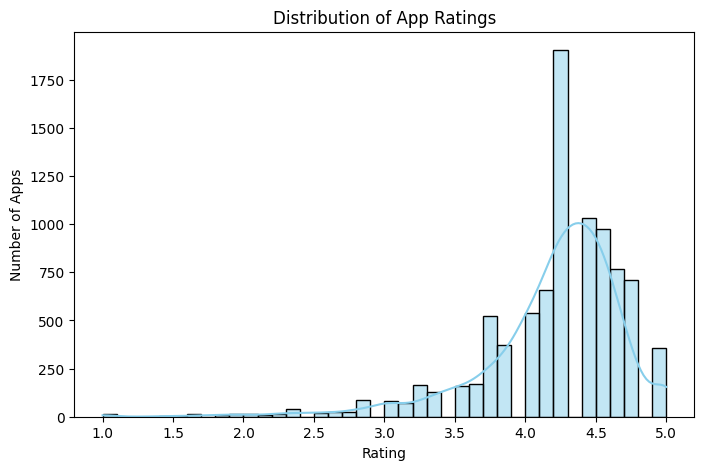

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

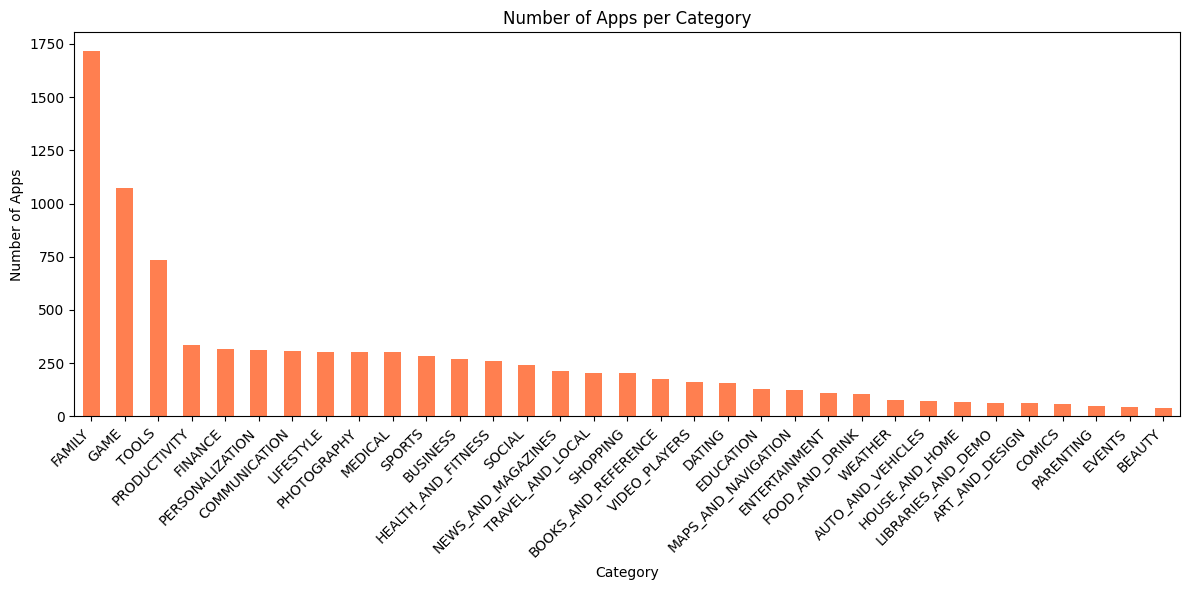

In [29]:
plt.figure(figsize=(12, 6))
df['Category'].value_counts().plot(kind='bar', color='coral')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rating.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rating_counts.index)  # Make sure all ratings are shown
plt.show()